In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join


# Read all results from txt files

aco_path = "./v2/ACO/"
aco_files = [f for f in listdir(aco_path) if isfile(join(aco_path, f))]

ga_path = "./v2/GA/"
ga_files = [f for f in listdir(ga_path) if isfile(join(ga_path, f))]

pso_path = "./v2/PSO/"
pso_files = [f for f in listdir(pso_path) if isfile(join(pso_path, f))]

pls_path = "./v2/PLS/"
pls_files = [f for f in listdir(pls_path) if isfile(join(pls_path, f))]

prs_path = "./v2/PRS/"
prs_files = [f for f in listdir(prs_path) if isfile(join(prs_path, f))]





# Ant Colony Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "E-factor"]
df_aco = pd.DataFrame(columns = column_names)

for file in aco_files:
    f_path = join(aco_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    evp = float(res['B'][5]) # evaporation factor

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    
    # Fetch best-cost iteration values
    its = [0] * mit
    it_st = res.loc[res['B'] == ' Best Cost'].index[0] + 1 # iterations
    for i in range(mit):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
                    
    df_aco = df_aco.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "E-factor": evp}, ignore_index=True)

    
    

# -------------------------------------------------------------------------------------
# Genetic Algorithm - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "N-pop", "PC"]
df_ga = pd.DataFrame(columns = column_names)

for file in ga_files:
    f_path = join(ga_path,file)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    pop = float(res['B'][5]) # population size
    pc = float(res['B'][6]) # population size


    sup = float(res['B'][7]) # minimum support
    pat = float(res['B'][9]) # patterns
    mit = int(res['B'][10]) # maximum iteraction count
    mal = int(res['B'][11]) # maximum evaluation count
       
        
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
        
    df_ga = df_ga.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "N-pop": pop, "PC": pc}, ignore_index=True)

    
    
    
    


# -------------------------------------------------------------------------------------
# Particle Swarm Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "N-particle", "Velocity", "C1", "C2"]
df_pso = pd.DataFrame(columns = column_names)

for file in pso_files:
    f_path = join(pso_path,file)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    vel = float(res['B'][5]) # velocity
    c1 = float(res['B'][6]) # personal coefficient
    c2 = float(res['B'][7]) # global coefficient
    npat = float(res['B'][8]) # particle count

    sup = float(res['B'][9]) # minimum support
    pat = float(res['B'][11]) # patterns
    mit = int(res['B'][12]) # maximum iteraction count
    mal = int(res['B'][13]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
        
    df_pso = df_pso.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "N-particle": npat, "Velocity": vel, "C1": c1, "C2": c2}, ignore_index=True)

    

    
    
# -------------------------------------------------------------------------------------
# Pure Local Search - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "Step-size"]
df_pls = pd.DataFrame(columns = column_names)

for file in pls_files:
    f_path = join(pls_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    stp = float(res['B'][5]) # step size

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    mal = int(res['B'][10]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
                    
    df_pls = df_pls.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "Step-size": stp}, ignore_index=True)

    
    
    

# -------------------------------------------------------------------------------------
# Pure Local Search - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations"]
df_prs = pd.DataFrame(columns = column_names)

for file in prs_files:
    f_path = join(prs_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    sup = float(res['B'][5]) # minimum support
    pat = float(res['B'][7]) # patterns
    mit = int(res['B'][8]) # maximum iteraction count
    mal = int(res['B'][9]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
                    
    df_prs = df_prs.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its}, ignore_index=True)

    

In [2]:
import numpy as np


# Combining the results
frames = [df_ga, df_pso, df_pls, df_prs]
df_res = pd.concat(frames, ignore_index=True)
# Only include these columns
df_res = df_res[['Data-set', 'Algorithm', 'Pattern-count', 'Max-evaluation', 'Evaluations']]

data_sets = ['HCV']
algorithms = ['GA-GRAANK', 'PSO-GRAANK', 'PLS-GRAANK', 'PRS-GRAANK']
evals = [10, 100, 1000]
eval_data = []

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'].str.contains(alg)]
                
        for ev in evals:
            df3 = df2.loc[df2['Max-evaluation'] == ev]
            # print(df3)

            # 100 rows
            eval_arr = []
            for index,row in df3.iterrows():
                # 10/100/1000 evaluations
                eval_arr.append(row['Evaluations'])
            eval_arr = np.array(eval_arr)
            eval_min = np.min(eval_arr, axis=0)
            eval_avg = np.mean(eval_arr, axis=0)
            eval_max = np.max(eval_arr, axis=0)
            eval_std = np.std(eval_arr, axis=0)
            eval_avg_mn = eval_avg - eval_std
            eval_avg_pl = eval_avg + eval_std

            eval_data.append([ds, alg, df3['Pattern-count'].mean(), df3['Pattern-count'].std(), ev, eval_min, eval_avg_mn, eval_avg, eval_avg_pl, eval_max])

df_data = pd.DataFrame(data=eval_data, columns=['Data-set', 'Algorithm', 'Patterns (mean)', 'Patterns (std)', 'Evaluations','Evaluations (min)', 'Evaluations (mu-sigma)', 'Evaluations (mu)', 'Evaluations (mu+sigma)', 'Evaluations (max)'])
df_data
#print(eval_arr)
#print(eval_avg)
#print(eval_std)
#print(eval_avg_mn)




,Data-set,Algorithm,Patterns (mean),Patterns (std),Evaluations,Evaluations (min),Evaluations (mu-sigma),Evaluations (mu),Evaluations (mu+sigma),Evaluations (max)
0,HCV,GA-GRAANK,1.64,0.810537,10,"[2.9273147741576652e-05, 3.947264545669851e-05...","[-0.0018714482946884294, -0.002008557522026943...","[0.0022237494855662223, 0.002311339318690241, ...","[0.006318947265820874, 0.006631236159407425, 0...","[0.027777777777777776, 0.037037037037037035, 0..."
1,HCV,GA-GRAANK,2.57,0.977060,100,"[5.510856387082553e-05, 3.891656288916563e-05,...","[-0.0020889079133038224, -0.000882492513836534...","[0.0022435694062358583, 0.001724655624548209, ...","[0.006576046725775539, 0.0043318037629329524, ...","[0.038461538461538464, 0.017241379310344827, 1..."
2,HCV,GA-GRAANK,2.87,1.292207,1000,"[2.2755717373990216e-05, 5.2845743275379165e-0...","[-0.0021009939003658355, -0.002502344135784628...","[0.002285941829276157, 0.0022473516581405914, ...","[0.006672877558918149, 0.006997047452065811, 0...","[0.02702702702702703, 0.038461538461538464, 1...."
3,HCV,PSO-GRAANK,1.25,0.457817,10,"[3.0493382935902908e-05, 3.0493382935902908e-0...","[-0.0020180738354752515, -0.002018073835475251...","[0.0025125046705517305, 0.0025125046705517305,...","[0.007043083176578712, 0.007043083176578712, 0...","[0.03125, 0.03125, 0.018867924528301886, 0.010..."
4,HCV,PSO-GRAANK,2.11,0.919980,100,"[5.52791597567717e-05, 5.52791597567717e-05, 4...","[-0.0008421465141561692, -0.000842146514156169...","[0.0019714260746370605, 0.0019714260746370605,...","[0.00478499866343029, 0.00478499866343029, 0.0...","[0.017241379310344827, 0.017241379310344827, 0..."
5,HCV,PSO-GRAANK,2.05,0.891883,1000,"[7.72499034376207e-05, 7.72499034376207e-05, 2...","[-0.0007955221840490658, -0.000795522184049065...","[0.0019900772391708175, 0.0019900772391708175,...","[0.004775676662390701, 0.004775676662390701, 0...","[0.02040816326530612, 0.02040816326530612, 0.0..."
6,HCV,PLS-GRAANK,1.91,0.888706,10,"[6.075334143377886e-05, 6.075334143377886e-05,...","[-1.0530092464991416e-05, 8.391177595143623e-0...","[0.0007840824609986315, 0.0005738174244932119,...","[0.0015786950144622545, 0.00113924367139128, 0...","[0.004081632653061225, 0.004081632653061225, 0..."
7,HCV,PLS-GRAANK,2.24,0.865967,100,"[5.26454330086865e-05, 5.176251358765982e-05, ...","[9.767936034954885e-06, -2.2605147871675385e-0...","[0.0007683465584536866, 0.0005607955745981346,...","[0.0015269251808724183, 0.0011441962970679446,...","[0.00425531914893617, 0.00425531914893617, 0.0..."
8,HCV,PLS-GRAANK,2.43,0.934793,1000,"[4.870920603994155e-05, 4.378092027494418e-05,...","[-4.835920219121016e-05, 4.563127356219159e-05...","[0.0008018409056706031, 0.0005322344417099716,...","[0.0016520410135324164, 0.0010188376098577516,...","[0.004545454545454545, 0.0027247956403269754, ..."
9,HCV,PRS-GRAANK,1.87,0.799684,10,"[4.199739616143799e-05, 4.199739616143799e-05,...","[-0.00033239413697479204, -0.00015665365681040...","[0.0008198401623261234, 0.0004971610164702025,...","[0.001972074461627039, 0.0011509756897508145, ...","[0.006993006993006993, 0.004201680672268907, 0..."


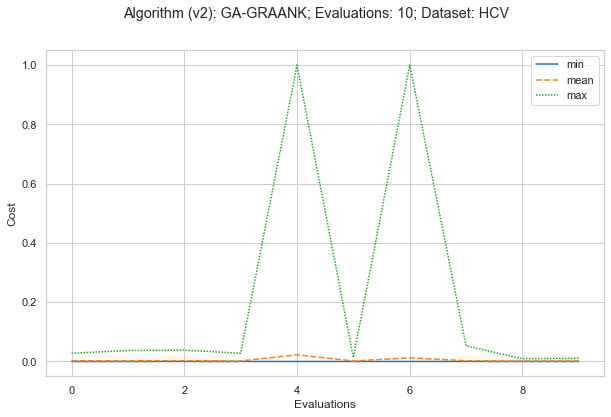

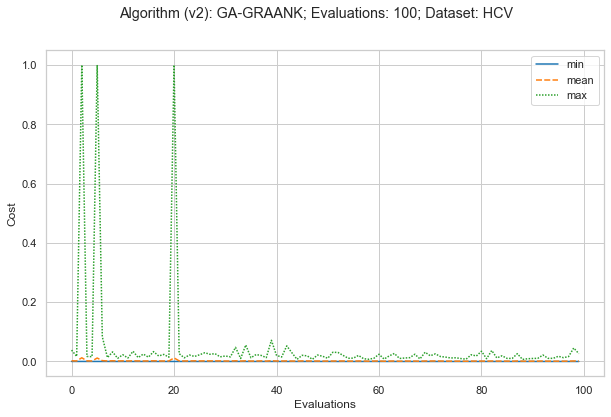

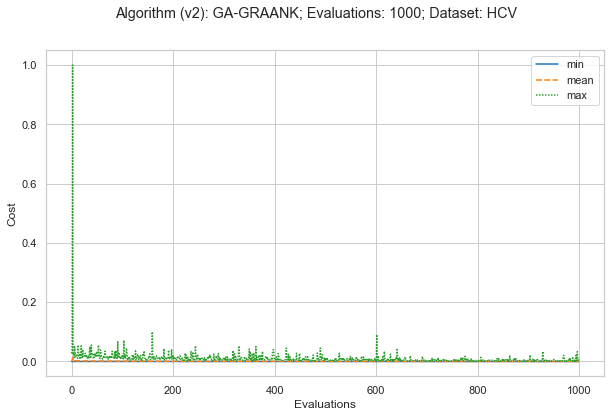

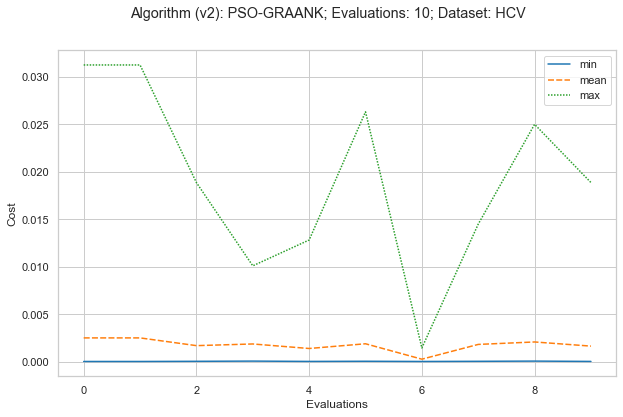

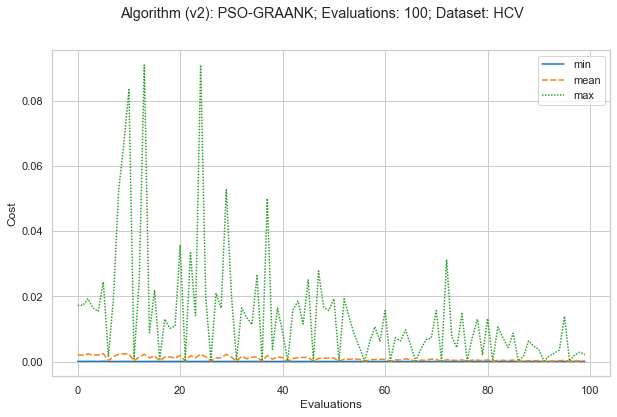

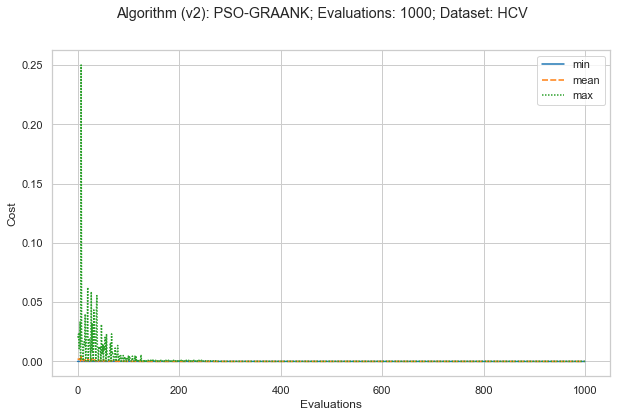

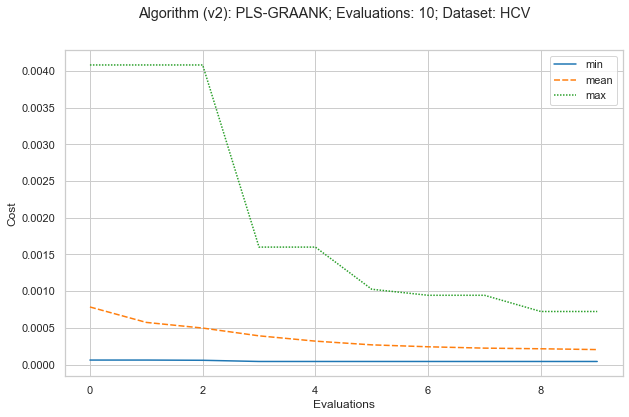

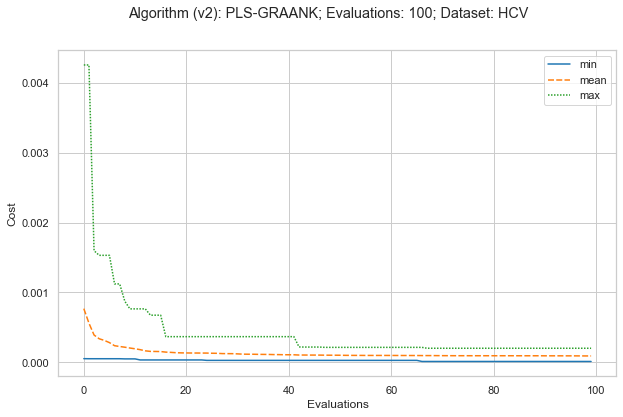

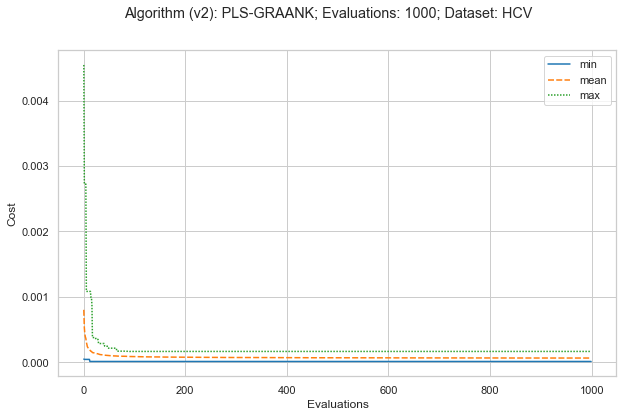

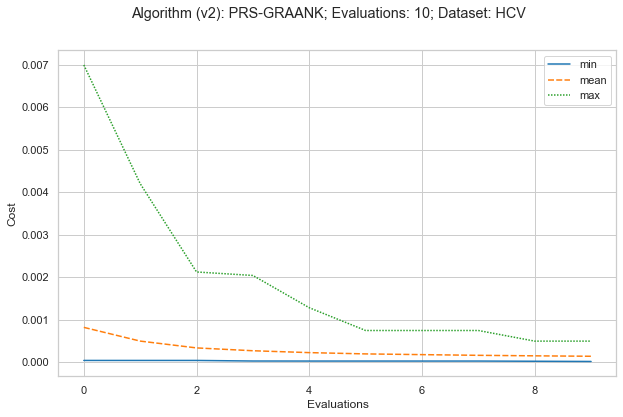

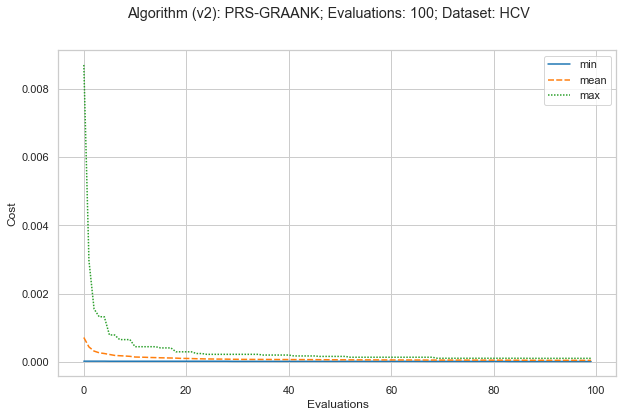

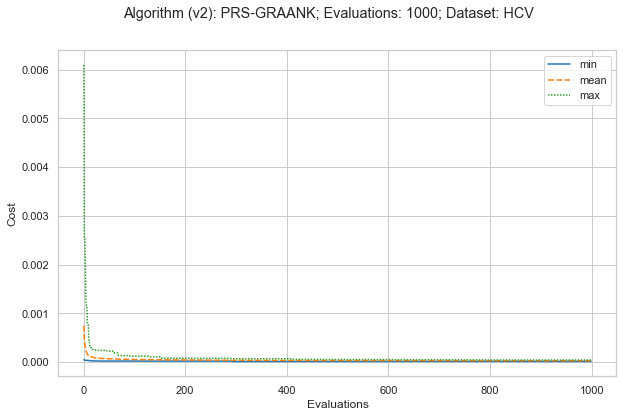

In [3]:
# Plotting the results 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

for alg in algorithms:
    df_alg = df_data.loc[df_data['Algorithm'].str.contains(alg)]
    
    for ds in data_sets:
        df1 = df_alg.loc[df_alg['Data-set'] == ds]

        for ev in evals:
            df2 = df1.loc[df1['Evaluations'] == ev]

            fig = plt.figure(figsize=(10,6))
            for index,row in df2.iterrows():
                # Results  
                values = np.array([row['Evaluations (min)'], row['Evaluations (mu)'], row['Evaluations (max)']]).T
                limits = np.arange(row['Evaluations'])
                data = pd.DataFrame(values, limits, columns=["min", "mean", "max"])
                
                sns.lineplot(data=data, palette="tab10")
                plt.xlabel('Evaluations')
                plt.ylabel('Cost')
                
            fig.suptitle('Algorithm (v2): ' + str(alg) + '; Evaluations: ' + str(row['Evaluations']) + '; Dataset: ' + ds)
    # print(data)